In [1]:
import pandas as pd
import sweetviz as sv

# EDA

In [2]:
df = pd.read_csv("..\..\Project_DATA\HealthCarePred_flat.csv")

In [7]:
df.head()

,BENE_ID,BENE_ZIP,STATE_CD,State_County_CD,AGE,SEX,State,County,race,gender,...,SNF2012,DME2012,IP2013,OP2013,Carrier2013,HHA2013,Hospice2013,SNF2013,DME2013,Spending2013
0,zzzzzzmzzLwXfmw,10401290,22,22070,67,1,Massachusetts,Hampden,White,Male,...,0.0,0.0,0.0,0.00,904.30,0.0,0.0,0.0,0.0,904.30
1,zzzzzzmzzLwXfpL,27704109,22,22150,67,1,Massachusetts,Plymouth,White,Male,...,0.0,0.0,0.0,149.53,398.76,0.0,0.0,0.0,0.0,548.29
2,zzzzzzmzzLwXfpP,21514836,22,22160,53,1,Massachusetts,Suffolk,White,Male,...,0.0,0.0,0.0,5891.74,2231.73,0.0,0.0,0.0,0.0,8123.47
3,zzzzzzmzzLwXfwL,19441034,22,22040,67,2,Massachusetts,Essex,White,Female,...,0.0,0.0,0.0,400.94,965.10,0.0,0.0,0.0,0.0,1366.04
4,zzzzzzmzzLwXfwe,24525510,22,22090,67,1,Massachusetts,Middlesex,White,Male,...,0.0,0.0,0.0,1205.47,1103.52,0.0,0.0,0.0,0.0,2308.99


In [8]:
df.dtypes

BENE_ID             object
BENE_ZIP             int64
STATE_CD             int64
State_County_CD      int64
AGE                  int64
SEX                  int64
State               object
County              object
race                object
gender              object
CCS101               int64
CCS104               int64
CCS105               int64
CCS106               int64
CCS108               int64
CCS257               int64
CCS49                int64
CCS50                int64
CCS53                int64
CCS98                int64
CCS109               int64
CCS14                int64
CCS259               int64
CCS55                int64
CCS95                int64
CCS99                int64
CCS122               int64
CCS205               int64
CCS204               int64
CCS212               int64
                    ...   
P3B                  int64
P1C                  int64
P4A                  int64
P1D                  int64
D1D                  int64
O1C                  int64
P

In [9]:
df.shape

(131273, 483)

In [6]:
#analyzing the dataset
advert_report = sv.analyze(df, pairwise_analysis='on')
#display the report
advert_report.show_html('HealthCarePred_SV_report.html')

:FEATURES DONE:                    |█████████████████████| [100%]   02:04  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   59:48  -> (00:00 left)


Creating Associations graph... DONE!
Report HealthCarePred_SV_report.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


#### Here ia a link to report:

<a href="https://dl.dropboxusercontent.com/s/3poxpmt9ow0jh8b/HealthCarePred_SV_report.html?dl=0">HealthCarePred_SV_report.html</a>

#### Unfortunately nor GitHub and Dropbox rendering big HTML files, so this link downloading the file. Click on downloaded file to see it.


### Features cleansing:


#### BENE_ID - distinct code, drop
#### BENE_ZIP - almost distinct (same values for 27%), drop
#### STATE_CD - same value for all records, drop
#### State_County_CD - 15 distinct values, change to factor
#### Age
#### Sex - 1-Male, 2-Female, change to factor
#### State - same value for all records, drop
#### County - textual of State_County_CD, drop
#### race - change to integer, WHite-1, Hispanic-2, Black-3, Other-4
#### Gender - same as Sex, drop

#### CCSXXX - all - exponential distribution, maybe change to log

#### HCCXXX - chronic condition indicators, boolean, change to factor
#### HCC51, HCC52 - only one distinct value, don't make difference, drop

#### _029 - Not in use, drop 

#### Procedure Categories (M5B, O1E, etc.) - all - exponential distribution, maybe change to log

#### Spendings features - all, exponential distribution. Add Spendings2012 feature summarizing other 2012 spendings
#### Drop all spending features except Spendings2012 that is autcome feature 


In [13]:
### The Spendings2012 column doesn't exists in dataset so we calculating it :

df["Spending2012"] = df["IP2012"]+df["OP2012"]+df["Carrier2012"]+df["HHA2012"]+df["Hospice2012"]+df["SNF2012"]+df["DME2012"]


In [14]:
### change race feature to numeric categorical
df.loc[df['race'] == "White", 'race'] = 1
df.loc[df['race'] == "Hispanic", 'race'] = 2
df.loc[df['race'] == "Black", 'race'] = 3
df.loc[df['race'] == "Other", 'race'] = 4

In [15]:
### drop unnecessary features
df = df.drop(columns=['BENE_ID', 'BENE_ZIP', 'STATE_CD', 'State', 'County', 'gender', '_029', 'HCC51', 'HCC52',
                     'IP2012', 'OP2012', 'Carrier2012', 'HHA2012', 'Hospice2012', 'SNF2012', 'DME2012', 'IP2013', 
                      'OP2013', 'Carrier2013', 'HHA2013', 'Hospice2013', 'SNF2013', 'DME2013', 'Spending2013'])



In [16]:
df.to_csv("..\..\Project_DATA\HealthCarePred_flat_1.csv", index=False)

In [14]:
### Reload flat file after changes

df = pd.read_csv("..\..\Project_DATA\HealthCarePred_flat_1.csv")

In [3]:
df.head()

,State_County_CD,AGE,SEX,race,CCS101,CCS104,CCS105,CCS106,CCS108,CCS257,...,O1C,P2D,I3E,O1F,P8A,P2A,I4A,P2C,M5A,Spending2012
0,22070,67,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2695.43
1,22150,67,1,1,4,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,917.30
2,22160,53,1,1,14,0,16,2,0,1,...,0,0,0,0,0,0,0,0,0,8256.74
3,22040,67,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2315.34
4,22090,67,1,1,0,0,0,36,3,1,...,0,0,0,0,0,0,0,0,0,1826.93


In [35]:
corr_df_spearman = df.corr(method='spearman')

In [36]:
corr_df_spearman

,State_County_CD,AGE,SEX,race,CCS101,CCS104,CCS105,CCS106,CCS108,CCS257,...,SNF2012,DME2012,IP2013,OP2013,Carrier2013,HHA2013,Hospice2013,SNF2013,DME2013,Spending2013
State_County_CD,1.000000,-0.042259,-0.002879,0.111955,-0.001323,0.003995,-0.003068,-0.005467,0.012758,-0.024860,...,0.004272,0.004665,0.010103,0.039060,-0.017696,0.016164,-0.009052,-0.002157,0.002815,0.014821
AGE,-0.042259,1.000000,0.110259,-0.194410,0.193705,0.084302,0.152868,0.205401,0.173284,0.047265,...,0.148671,-0.017899,0.104605,-0.015615,0.130931,0.201530,0.095914,0.164417,-0.021624,0.125996
SEX,-0.002879,0.110259,1.000000,-0.018664,-0.152306,-0.017293,-0.065325,-0.039899,-0.018209,-0.007105,...,0.038890,-0.005431,0.006770,0.039712,0.039471,0.049552,0.016071,0.035055,-0.011893,0.043957
race,0.111955,-0.194410,-0.018664,1.000000,-0.056937,-0.003826,-0.034185,-0.059571,-0.020484,-0.029543,...,-0.033543,0.044593,-0.024106,0.045229,-0.095639,-0.036354,-0.017026,-0.038516,0.041853,-0.033713
CCS101,-0.001323,0.193705,-0.152306,-0.056937,1.000000,0.215954,0.259555,0.295498,0.338811,0.222557,...,0.158164,0.151159,0.152578,0.146560,0.209841,0.154324,0.036939,0.103023,0.135043,0.213896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HHA2013,0.016164,0.201530,0.049552,-0.036354,0.154324,0.112302,0.118415,0.173269,0.214465,0.182667,...,0.204061,0.179036,0.550822,0.235408,0.379586,1.000000,0.080620,0.445745,0.268429,0.497833
Hospice2013,-0.009052,0.095914,0.016071,-0.017026,0.036939,0.033345,0.032177,0.047533,0.070474,0.042155,...,0.080086,0.024532,0.091809,0.022189,0.054242,0.080620,1.000000,0.093909,0.029471,0.138921
SNF2013,-0.002157,0.164417,0.035055,-0.038516,0.103023,0.084214,0.085208,0.128382,0.166851,0.125933,...,0.236350,0.093977,0.536301,0.163176,0.335435,0.445745,0.093909,1.000000,0.169079,0.393168
DME2013,0.002815,-0.021624,-0.011893,0.041853,0.135043,0.082826,0.070881,0.105286,0.157888,0.167144,...,0.087775,0.626016,0.243960,0.243034,0.319608,0.268429,0.029471,0.169079,1.000000,0.376172


In [37]:
import matplotlib.pyplot as plt

#### Corellation of outcome variable with all other variables:

In [32]:

rows, cols = df.shape
features = list(df.columns)
for i in range(cols - 1):
    curr_corr = df["Spending2012"].corr(df[features[i]])
    if curr_corr > 0.3:
        print("Spending2012", ' - ', features[i], '  ', curr_corr) 

Spending2012  -  CCS133    0.30343094386491754
Spending2012  -  CCS158    0.30478568465596617
Spending2012  -  T1B    0.32494635305869035
Spending2012  -  T1D    0.3089556127250383
Spending2012  -  T1H    0.34514401751671214
Spending2012  -  T2A    0.34468202112222074
Spending2012  -  I1A    0.3700636475641556
Spending2012  -  M2B    0.386714621197312
Spending2012  -  M2A    0.45602103978920805
Spending2012  -  O1E    0.31493968222085666
Spending2012  -  IP2012    0.8267544866212594
Spending2012  -  OP2012    0.5448144577508799
Spending2012  -  Carrier2012    0.49583780311219894
Spending2012  -  HHA2012    0.3643676024124674
Spending2012  -  SNF2012    0.41795555143631036
Spending2012  -  IP2013    0.8267544866212594
Spending2012  -  OP2013    0.5448144577508799
Spending2012  -  Carrier2013    0.632194685095143
Spending2012  -  HHA2013    0.4287394273820737
Spending2012  -  SNF2013    0.40127472750871607
Spending2012  -  Spending2013    0.9126837820124462


# Outliers Detection

In [17]:
import seaborn as sns, numpy as np

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()


In [56]:
### Show number and percentage of outliers for every feature 
from pandas import DataFrame
from IPython.display import HTML
outliers = outliers.sort_values(ascending = False)
outliers_df = pd.DataFrame(outliers)
outliers_df["OutliersPercent"] = outliers_df[0] / df.count()
HTML(DataFrame(outliers_df).to_html())


,0,OutliersPercent
CCS58,32650,0.248718
CCS163,32554,0.247987
CCS91,31701,0.241489
CCS106,31669,0.241245
P5A,31388,0.239105
CCS155,30775,0.234435
CCS47,29548,0.225088
CCS138,29043,0.221241
CCS657,28980,0.220761
CCS48,28607,0.217920


#### Finding outliers using IQR doesn't work because of exponential distribution and a lot of zero values. Using 1.5 * IQR rule marks the most intresting (more costing, more sick) people as outliers. So I will not going to get rid of it.

In [ ]:

# rows, cols = df.shape
# features = list(df.columns)
# rows2delete = []
# for row in range(rows - 1):
#     for col in range(cols - 1):
#         curr_val = df.iloc[row][features[col]]
#         if curr_val < Q1[features[col]] - 1.5 * IQR[features[col]] or curr_val > Q3[features[col]] + 1.5 * IQR[features[col]] :
#             rows2delete.append(row)
#             break
            
# print(rows2delete)

## Missing Values

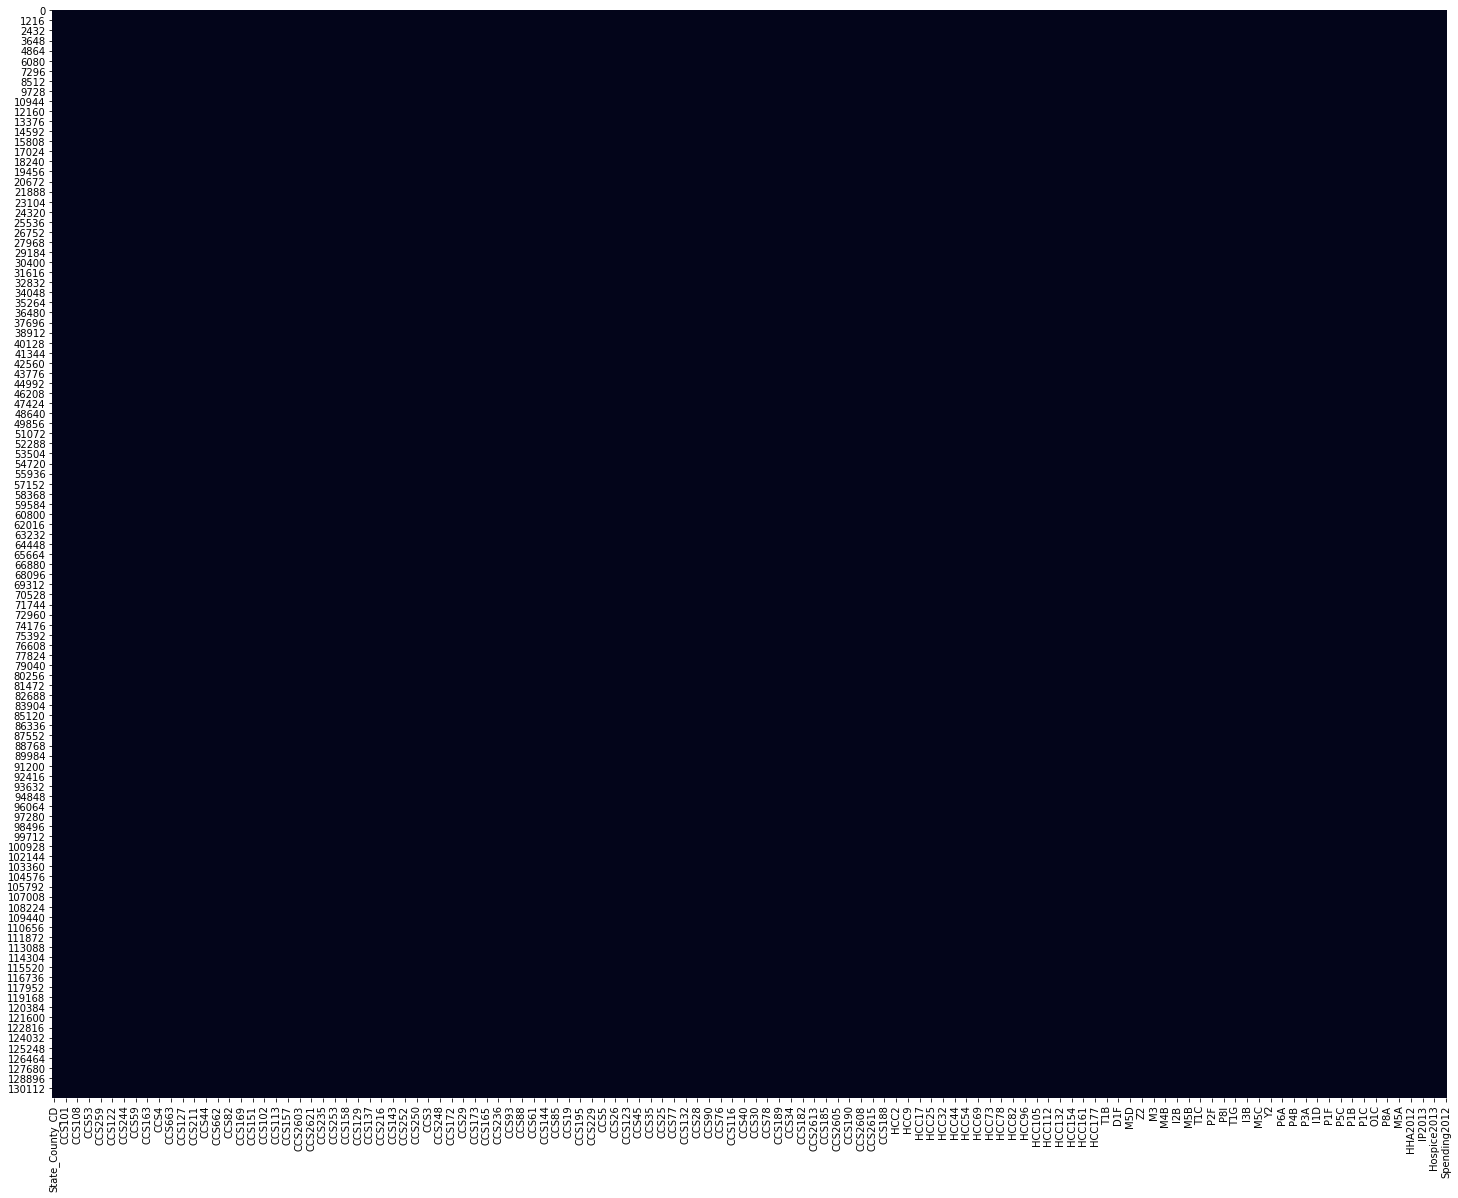

In [114]:
### pip install missingno
import missingno as msno

### plot the missingness (nullity) matrix
plt.figure(figsize=(25,20))
sns.heatmap(df.isnull(), cbar=False)

#### No missing values detected

### Attempt to change variables to make it distribute normally 

In [3]:
import seaborn as sns, numpy as np
from scipy import stats    
import matplotlib.pyplot as plt

In [4]:
### CCS259 is 
original_data = df["CCS259"]

### Let's try to use Box-Cox transformation to get more normal-shaped feature

In [21]:

fitted_data = stats.boxcox(original_data + 1)[0]

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


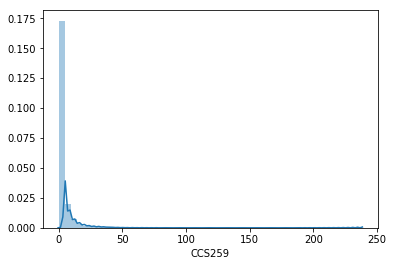

In [9]:

# plotting the original data(non-normal) 
sns.distplot(original_data) 


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


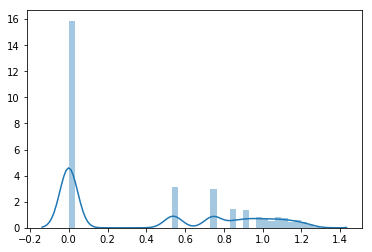

In [22]:
# and fitted data (after boxcox transformation)   
sns.distplot(fitted_data) 

#### The result of transformation doesn't look normally distributed as well. I have tried different features and the results were almost the same. I will continue with the data as it is.

In [15]:
#### In order to make classification of spending on the beneficiaries of HealthCare insurance based on their Chronic Disease indicators
#### and Diagnosis indicator I will drop the Procedure Indicators and make the Spending2012 feature categorical.


df = df.drop(columns=['D1E', 'M1B', 'T1A', 'T1B', 'T1D', 'T1H', 'T2A', 'D1F', 'I1B',
       'I4B', 'M1A', 'M5D', 'P6B', 'P6C', 'T2D', 'Z2', 'P7B', 'I1A', 'I1F',
       'M3', 'O1G', 'P8E', 'P5A', 'M4B', 'P1E', 'P1G', 'M2B', 'I2B', 'M2A',
       'M2C', 'O1A', 'M5B', 'I1E', 'I2D', 'O1E', 'T1C', 'T1E', 'O1D', 'P0',
       'P2F', 'P9A', 'P9B', 'I3C', 'P8I', 'T1F', 'P8B', 'P8D', 'T1G', 'Y1',
       'I2A', 'T2C', 'I3B', 'I3F', 'P6D', 'P8H', 'M5C', 'D1B', 'P5E', 'I2C',
       'Y2', 'D1A', 'I1C', 'D1C', 'P6A', 'M6', 'P7A', 'I3A', 'P4B', 'P3D',
       'I3D', 'T2B', 'P3A', 'P5B', 'P8F', 'O1B', 'I1D', 'P4C', 'P4E', 'M4A',
       'P1F', 'P4D', 'P5D', 'P8C', 'P5C', 'P3C', 'P1A', 'D1G', 'P1B', 'P2B',
       'P2E', 'P3B', 'P1C', 'P4A', 'P1D', 'D1D', 'O1C', 'P2D', 'I3E', 'O1F',
       'P8A', 'P2A', 'I4A', 'P2C', 'M5A'])


#### Change the Spending2012 column to categories

In [16]:
df["Spending_Cat"] = pd.cut(df.Spending2012,bins=[-1,50000,100000,200000,1000000],labels=[1,2,3,4])
df = df.drop(columns=['Spending2012'])

In [17]:
df.head()

,State_County_CD,AGE,SEX,race,CCS101,CCS104,CCS105,CCS106,CCS108,CCS257,...,HCC154,HCC155,HCC157,HCC158,HCC161,HCC164,HCC174,HCC176,HCC177,Spending_Cat
0,22070,67,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,22150,67,1,1,4,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,22160,53,1,1,14,0,16,2,0,1,...,0,0,0,0,0,0,0,0,0,1
3,22040,67,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,22090,67,1,1,0,0,0,36,3,1,...,0,0,0,0,0,0,0,0,0,1


In [18]:
df.to_csv("..\..\Project_DATA\HealthCareCat_flat_1.csv", index=False)